<a href="https://colab.research.google.com/github/CodeHunterOfficial/DL-for-beginers/blob/main/Lecture_3_Adjustment_of_several_weights_at_once_generalization_of_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Корректировка сразу нескольких весов: обобщение градиентного спуска

**План**

>* Обучение методом градиентного спуска с несколькими входами.
* Замораживание одного веса: для чего?
* Обучение методом градиентного спуска с несколькими выходами.
* Обучение методом градиентного спуска с несколькими входами
и выходами.
* Визуализация значений весов.
* Визуализация скалярных произведений.

***Нельзя научиться ходить, просто следуя правилам.
Мы учимся, пробуя и падая.*** - *Ричард Брэнсон (Richard Branson).*

##Обучение методом градиентного спуска с несколькими входами
**Градиентный спуск можно использовать также с несколькими входами** 

В предыдущем лекции вы узнали, как корректировать вес с помощью метода градиентного спуска. В этой главе мы посмотрим, как тот же метод использовать
для обучения сети с несколькими весами. Я предлагаю без долгих вступлений
сразу взяться за дело, согласны? Следующая диаграмма иллюстрирует процесс
обучения сети с несколькими входами.

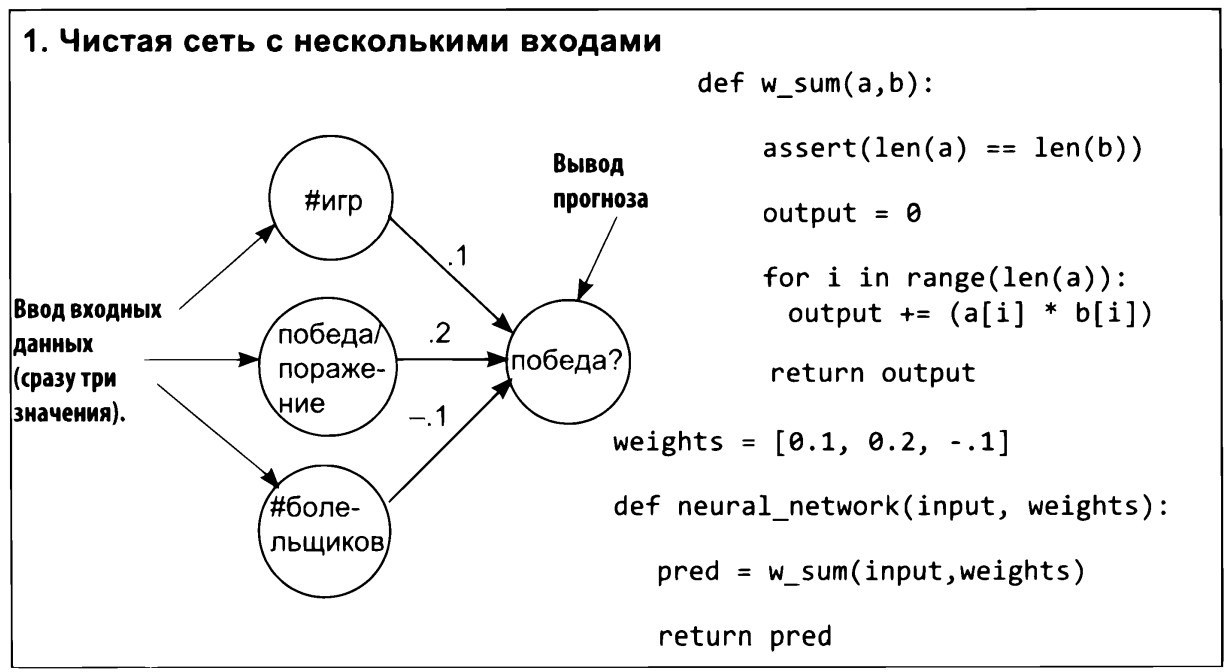

In [35]:
def w_sum(a,b):
    assert(len(a) == len(b))
    output = 0

    for i in range(len(a)):
        output += (a[i] * b[i])

    return output

weights = [0.1, 0.2, -.1] 

def neural_network(input,weights):
    pred = w_sum(input,weights)
    return pred

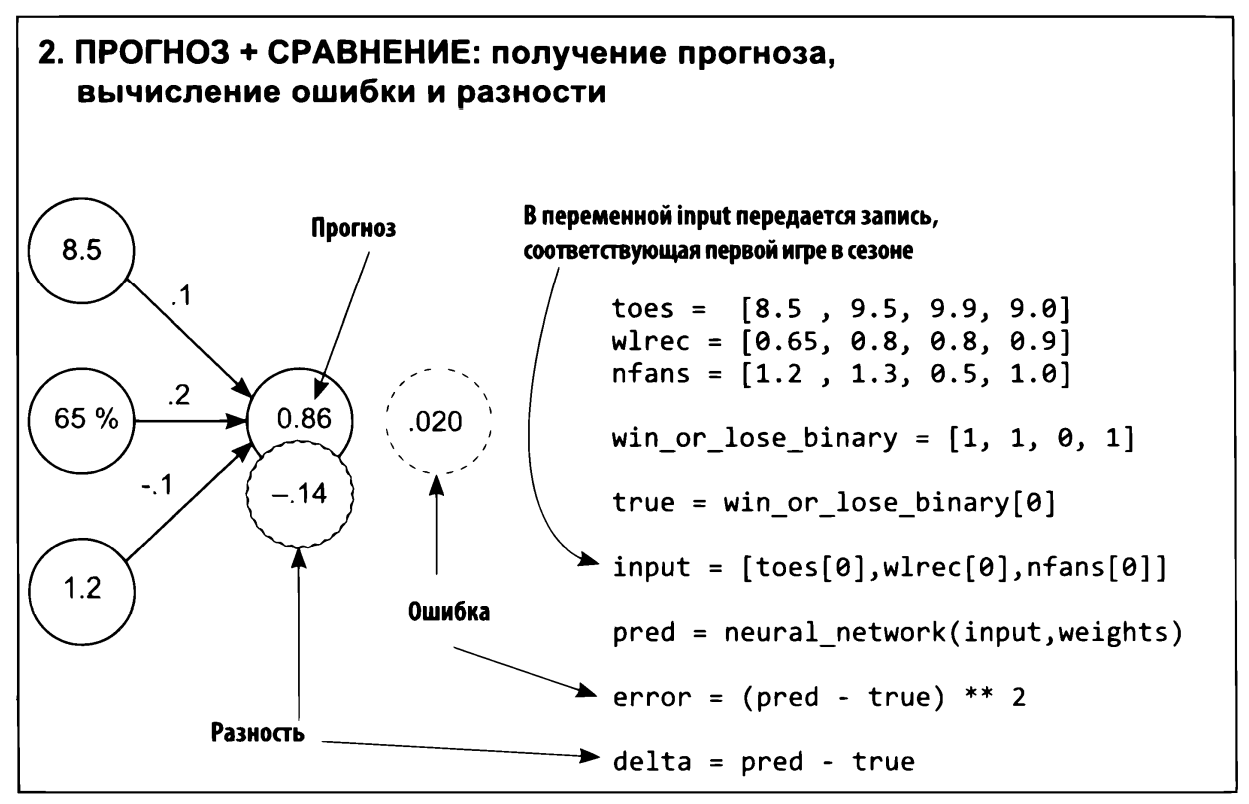

In [19]:
toes =  [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

win_or_lose_binary = [1, 1, 0, 1]

true = win_or_lose_binary[0]

# Input corresponds to every entry
# for the first game of the season.

input = [toes[0],wlrec[0],nfans[0]]

pred = neural_network(input,weights)
error = (pred - true) ** 2
delta = pred - true

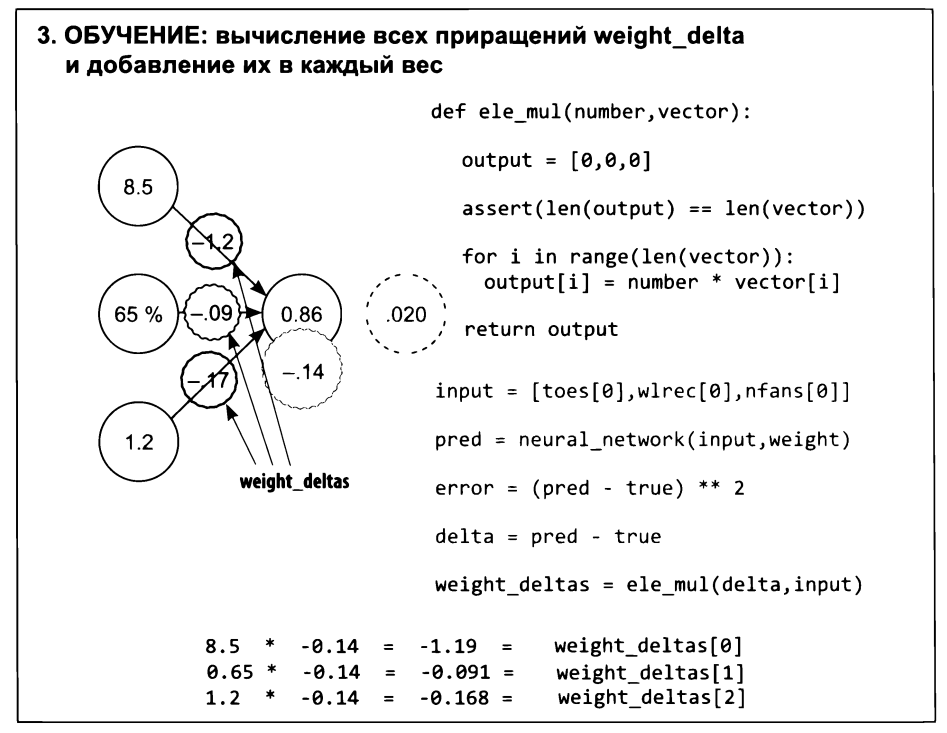

In [37]:
def ele_mul(number,vector):
    output = [0,0,0]

    assert(len(output) == len(vector))

    for i in range(len(vector)):
        output[i] = number * vector[i]

    return output
    
input = [toes[0],wlrec[0],nfans[0]]

pred = neural_network(input,weights)
error = (pred - true) ** 2
delta = pred - true
weight_deltas=ele_mul(delta, input)

print("Weight Deltas:" + str(weight_deltas))


Weight Deltas:[-1.189999999999999, -0.09099999999999994, -0.16799999999999987]


На этой диаграмме нет ничего нового. Каждое приращение weight_delta вычисляется умножением разности прогноза и истины на соответствующее входное
значение. В данном случае в вычислении единственного выходного значения
участвуют три веса, поэтому в вычислении приращения для каждого из них используется одна и та же разность прогноза и истины. Но из-за разных входных
значений приращения весов получаются разными. Также отметьте, что здесь
для умножения каждого входного значения на разность повторно используется
функция ele_mul, которую мы написали раньше.

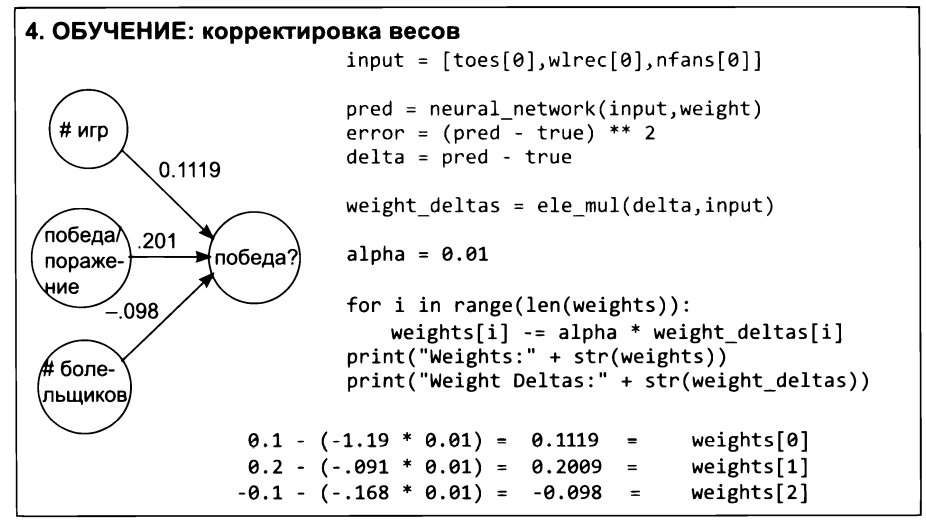

In [38]:
input = [toes[0],wlrec[0],nfans[0]]

pred = neural_network(input,weights)
error = (pred - true) ** 2
delta = pred - true
weight_deltas=ele_mul(delta, input)


alpha = 0.01

for i in range(len(weights)):
    weights[i] -= alpha * weight_deltas[i]
    
print("Weights:" + str(weights))
print()
print("Weight Deltas:" + str(weight_deltas))

Weights:[0.1119, 0.20091, -0.09832]

Weight Deltas:[-1.189999999999999, -0.09099999999999994, -0.16799999999999987]


## Градиентный спуск с несколькими входами, описание
**Прост в реализации и увлекателен в изучении**

При сопоставлении с нейронной сетью с единственным весом реализация
градиентного спуска с несколькими входами кажется достаточно очевидной.
Однако она обладает рядом интересных особенностей, на которых стоит остановиться. Для начала поместим оба подхода рядом друг с другом

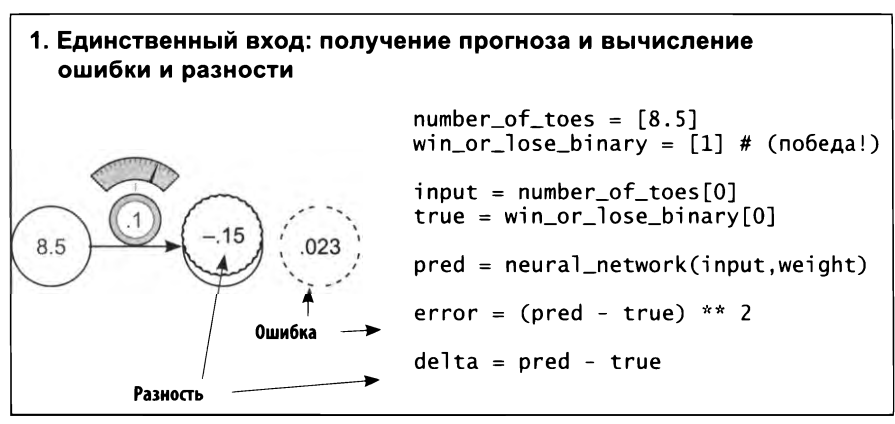

In [42]:
def neural_network(input, weights):
  out = 0
  for i in range(len(input)):
    out += (input[i] * weights[i])
  return out

def ele_mul(scalar, vector):
  out = [0,0,0]
  for i in range(len(out)):
    out[i] = vector[i] * scalar
  return out

toes =  [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

win_or_lose_binary = [1, 1, 0, 1]
true = win_or_lose_binary[0]

In [49]:
weights = [0.1, 0.2, -.1]
input = [toes[0]]
pred = neural_network(input,weights)
error = (pred - true) ** 2
delta = pred - true
print(error, delta)

0.022499999999999975 -0.1499999999999999


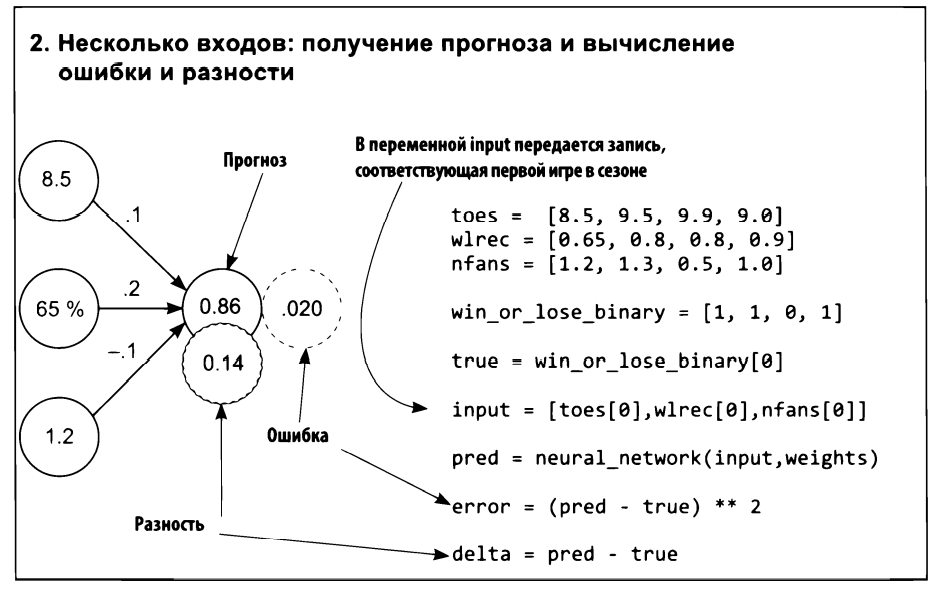

In [51]:
toes =  [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

win_or_lose_binary = [1, 1, 0, 1]
true = win_or_lose_binary[0]

input = [toes[0],wlrec[0],nfans[0]]
pred = neural_network(input,weights)
error = (pred - true) ** 2
delta = pred - true
print(error, delta)


0.01959999999999997 -0.1399999999999999


Вплоть до вычисления разности между прогнозом и истинным значением, градиентный спуск с единственным и несколькими входами выглядят совершенно
идентично (кроме различий в вычислении прогноза, которые рассматривались
в главе 3). В обоих случаях мы получаем прогноз и вычисляем ошибку и разность одинаковым способом. Но дальше возникает проблема: когда у нас имелся только один вес, мы имели только одно входное значение (и вычислялВплоть до вычисления разности между прогнозом и истинным значением, градиентный спуск с единственным и несколькими входами выглядят совершенно
идентично (кроме различий в вычислении прогноза, которые рассматривались
в главе 3). В обоих случаях мы получаем прогноз и вычисляем ошибку и разность одинаковым способом. Но дальше возникает проблема: когда у нас имелся только один вес, мы имели только одно входное значение (и вычислял

### Как превратить одну разность (для одного прогноза) в три приращения weight_delta?

Вспомним определение и назначение разности delta и приращения weightdelta. Разность delta определяет величину, на которую желательно скорректировать выходное значение. В данном случае она вычисляется прямым
вычитанием истинного значения из прогноза (pred - true). Положительное
значение delta указывает, что прогноз имеет слишком большое значение, а отрицательное — что слишком маленькое

**РАЗНОСТЬ**
> ***Определяет, насколько больше или меньше должно быть значение на выходе, чтобы можно было считать прогноз идеальным для данного обучающего
экземпляра.***

С другой стороны, приращение weight_delta является оценкой величины и направления смещения веса для уменьшения разности delta и определяется через
производную. Как преобразовать delta в weight_delta? Умножением delta на
вход, соответствующий весу.

**ПРИРАЩЕНИЕ**
> ***Оценка на основе производной величины и направления смещения веса для
уменьшения разности delta, учитывающая масштабирование, обращение
знака и остановку.***


Посмотрим на это с точки зрения единственного веса:

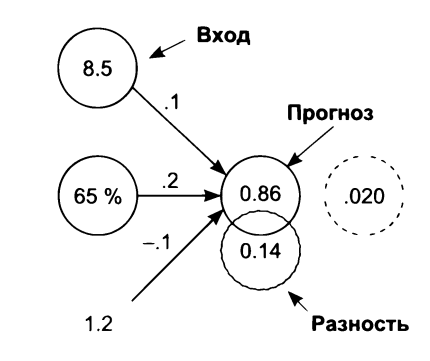

delta: Эй, на входе! Да, вы трое. В следующий раз прогноз должен быть чуть
выше.

Единственный вес: Хм-м, если бы на входе был 0, тогда бы вес не имел значения, и я не смог бы ничего изменить (остановка). Если бы на входе было отрицательное число, тогда бы вес следовало уменьшить, а не увеличить (обращение
знака). Но на входе положительное число и довольно большое, то есть можно
ожидать, что оно имеет большое значение для общего результата. Я сильно
увеличу свой вес для компенсации ошибки (масштабирование).

Единственный вес увеличивает свое значение.

О чем на самом деле говорят эти свойства/утверждения? Все они (остановка,
обращение знака и масштабирование) отмечают роль веса в разности, обусловленной входным значением. То есть каждое приращение weight delta является своего рода модифицированной входом версией разности delta. 

Это возвращает нас к первоначальному вопросу: как превратить единственное
значение разности delta в три приращения weight_delta? Итак, поскольку для
каждого веса имеется свое входное значение и общая разность, мы умножаем
вход input, соответствующий весу, на разность delta и получаем оответствующее приращение weight_delta. Рассмотрим этот процесс в действии.

На следующих двух рисунках можно видеть, как вычисляются переменные
weight_delta для сети с одним входом и для новой сети с несколькими входами. Сходство особенно заметно, если взглянуть на псевдокод внизу каждого
рисунка. Обратите внимание, что в версии с несколькими весами значение
delta (0.14) умножается на каждый вход и в результате получаются разные
приращения weight_delta. Процесс очень прост.


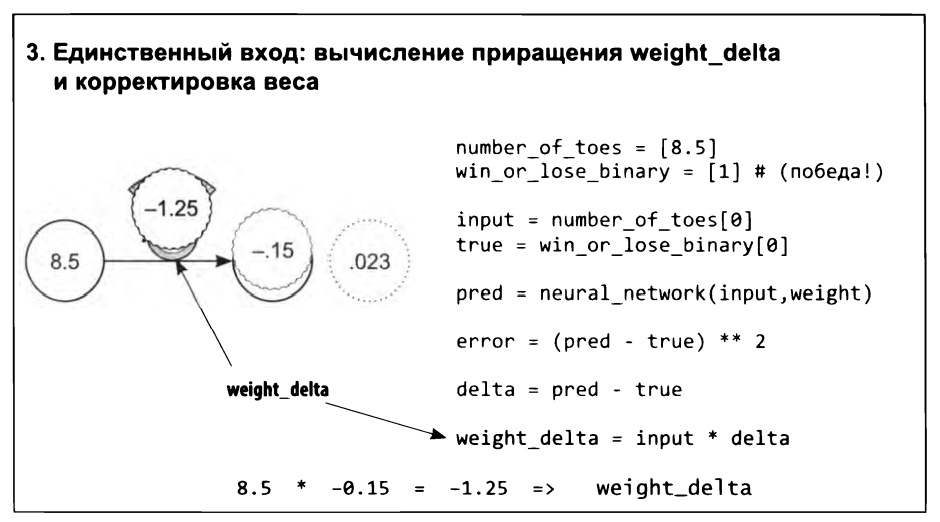

In [52]:
number_of_toes=[8.5]
win_or_lose_binary=[1] # Победа!

input=number_of_toes[0]
true=win_or_lose_binary[0]

pred=neural_network(input, weights)
error=(pred-true)**2
delta=pred-true
weight_delta=input*delta

TypeError: ignored

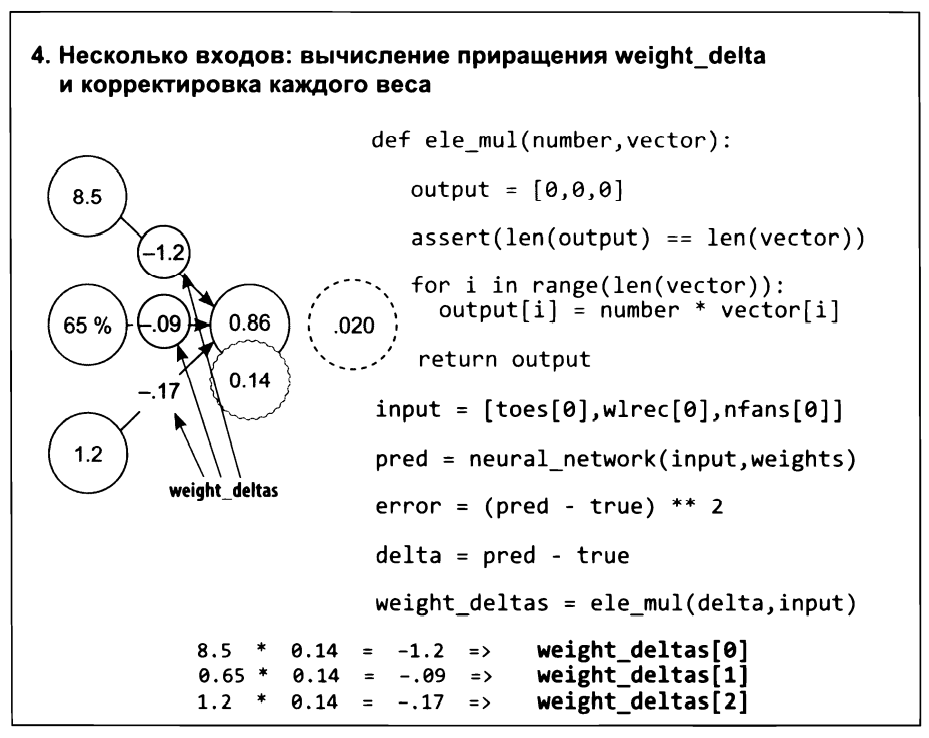

In [53]:
toes =  [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

In [56]:
def ele_mul(scalar, vector):
  output = [0,0,0]
  for i in range(len(output)):
    output[i] = vector[i] * scalar
  return output

weights = [0.1, 0.2, -.1]
input = [toes[0],wlrec[0],nfans[0]]

win_or_lose_binary = [1, 1, 0, 1]
true = win_or_lose_binary[0]

pred=neural_network(input, weights)
error=(pred-true)**2
delta=pred-true
weight_deltas=ele_mul(delta, input)
print(weight_deltas)

[-1.189999999999999, -0.09099999999999994, -0.16799999999999987]


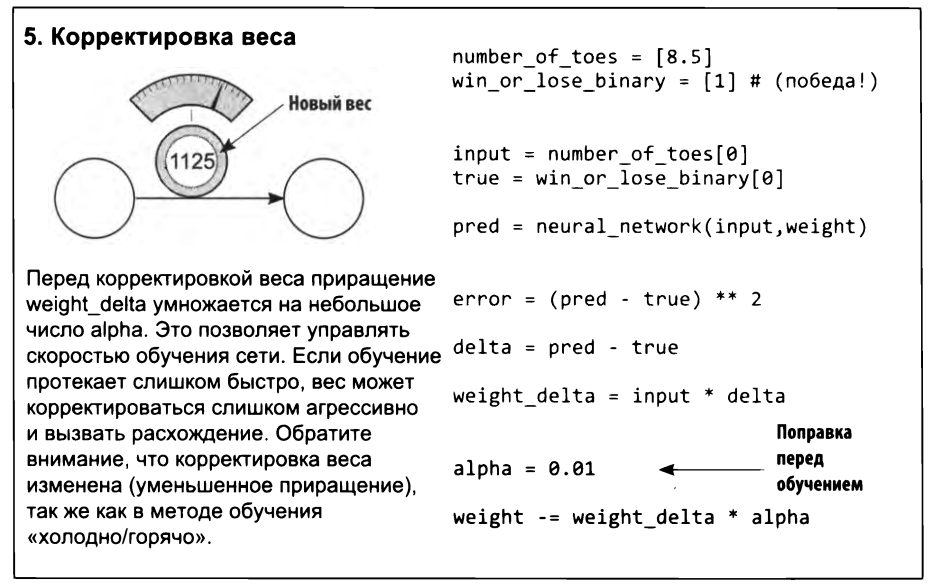

In [57]:
number_of_toes=[8.5]
win_or_lose_binary=[1] # Победа!

input=number_of_toes[0]
true=win_or_lose_binary[0]

pred=neural_network(input, weights)
error=(pred-true)**2
delta=pred-true
weight_delta=input*delta

TypeError: ignored

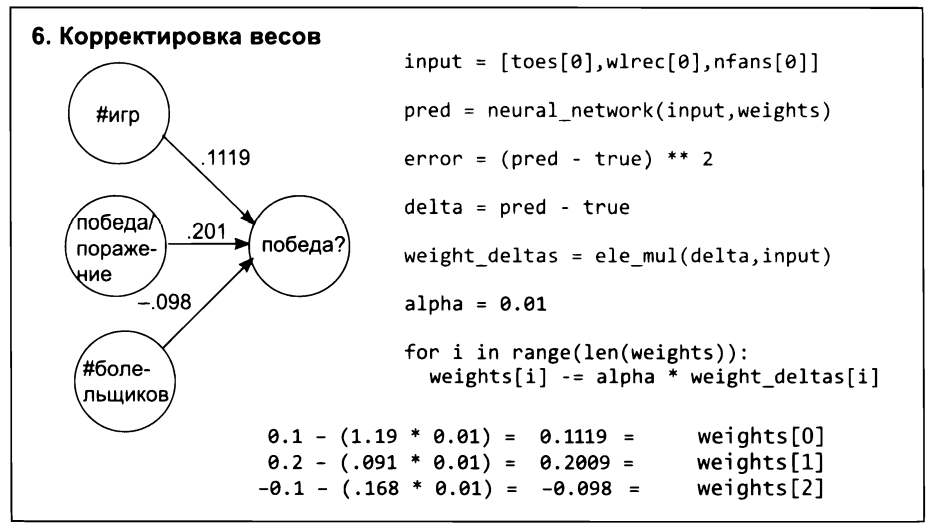

In [59]:
input = [toes[0],wlrec[0],nfans[0]]
pred = neural_network(input,weights)
error = (pred - true) ** 2
delta = pred - true
weight_deltas=ele_mul(delta,input)
alpha = 0.01
for i in range(len(weights)):
   weights[i]-=alpha*weight_deltas[i]

print(weights)

[0.11498061250000001, 0.20114557625, -0.09788509000000001]


Последний шаг тоже выполняется почти в точности как в сети с единственным
входом. После получения значений weight_delta они умножаются на альфакоэффициент и вычитаются из текущих значений весов. Это фактически тот
же процесс, только повторяется в отдельности для каждого веса

**Рассмотрим несколько шагов обучения**

In [ ]:
def neural_network(input, weights):
  out = 0 
  for i in range(len(input)): 
    out += (input[i] * weights[i])
  return out

def ele_mul(scalar, vector):
  out = [0,0,0]
  for i in range(len(out)):
    out[i] = vector[i] * scalar
  return out

toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]
win_or_lose_binary = [1, 1, 0, 1]
true = win_or_lose_binary[0]
alpha = 0.01
weights = [0.1, 0.2, -.1]
input = [toes[0],wlrec[0],nfans[0]]


for iter in range(3):
  pred = neural_network(input,weights)
  error = (pred - true) ** 2
  delta = pred - true
  weight_deltas=ele_mul(delta,input)
  print("Iteration:" + str(iter+1))
  print("Pred:" + str(pred))
  print("Error:" + str(error))
  print("Delta:" + str(delta))
  print("Weights:" + str(weights))
  print("Weight_Deltas:")
  print(str(weight_deltas))
  print()
  for i in range(len(weights)):
    weights[i]-=alpha*weight_deltas[i]

Iteration:1
Pred:0.8600000000000001
Error:0.01959999999999997
Delta:-0.1399999999999999
Weights:[0.1, 0.2, -0.1]
Weight_Deltas:
[-1.189999999999999, -0.09099999999999994, -0.16799999999999987]

Iteration:2
Pred:0.9637574999999999
Error:0.0013135188062500048
Delta:-0.036242500000000066
Weights:[0.1119, 0.20091, -0.09832]
Weight_Deltas:
[-0.30806125000000056, -0.023557625000000044, -0.04349100000000008]

Iteration:3
Pred:0.9906177228125002
Error:8.802712522307997e-05
Delta:-0.009382277187499843
Weights:[0.11498061250000001, 0.20114557625, -0.09788509000000001]
Weight_Deltas:
[-0.07974935609374867, -0.006098480171874899, -0.011258732624999811]



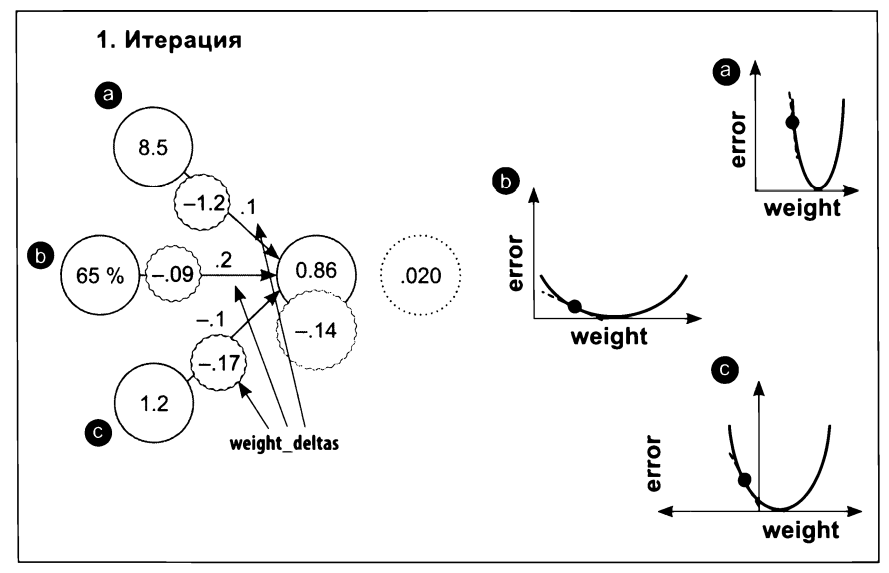

Мы можем нарисовать три графика «ошибка/вес», по одному для каждого веса.
Как и прежде, на значения weight_delta влияют наклоны кривых (обозначены пунктирными касательными). Обратите внимание, что наклон weight_delta
на графике (а) больше, чем на других. Почему он оказался больше, ведь все
значения weight_delta вычисляются на основе одной и той же разности delta
и оценки ошибки error? Дело в том, что для (а) входное значение существенно
больше, а значит, и производная больше.


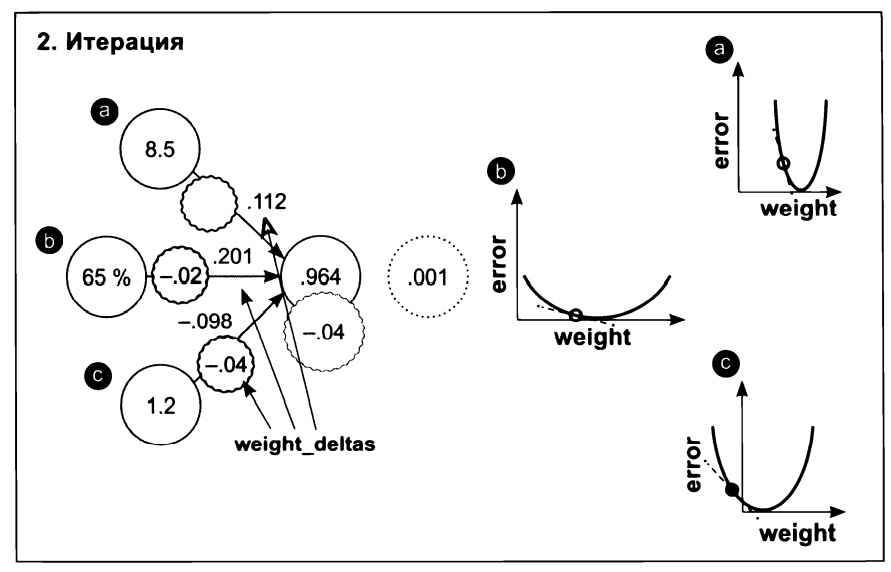

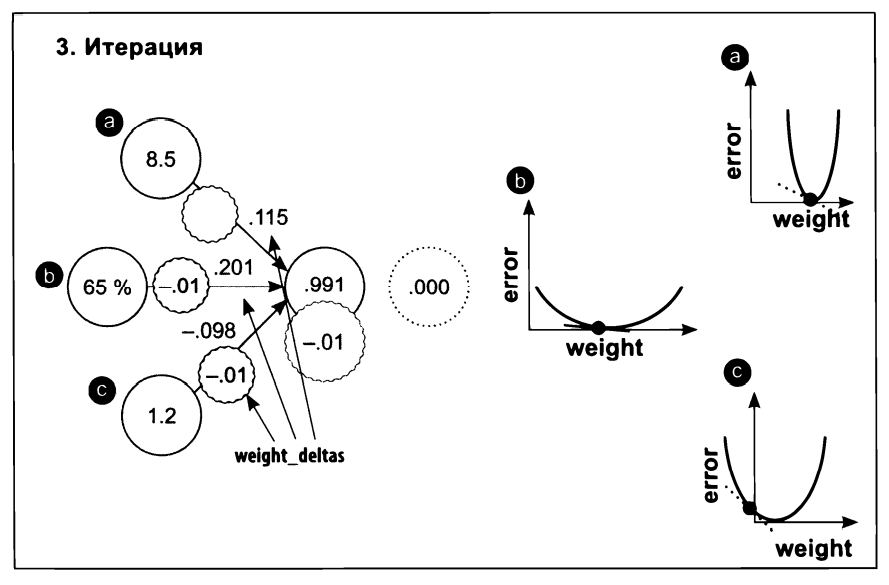

Из описанного процесса обучения можно сделать несколько выводов. Основное обучение (наиболее существенный вклад в изменение веса) обусловлено
входом (а), потому что соответствующая ему кривая имеет самый большой
наклон. Однако это не всегда оправданно. Применение метода, называемого
нормализацией, помогает сделать обучение более равномерным по всем весам,
даже в таких наборах данных, как этот. Такое существенное различие в наклонах вынудило меня использовать меньший альфа-коэффициент, чем хотелось
(0.01 вместо 0.1). Попробуйте установить альфа-коэффициент равным 0.1
и посмотрите, вызовет ли это расхождение.

### Замораживание одного веса: для чего?

Следующий эксперимент немного сложнее с точки зрения теории, но, как мне
кажется, он поможет вам понять, как веса влияют друг на друга. Здесь мы повторим тот же процесс обучения, но на этот раз не будем корректировать вес
(а). Мы попытаемся обучить сеть, используя только веса (Ь) и (с) (weights[1]
и weights[2j)

In [ ]:
def neural_network(input, weights):
  out = 0
  for i in range(len(input)):
    out += (input[i] * weights[i])
  return out

def ele_mul(scalar, vector):
  out = [0,0,0]
  for i in range(len(out)):
    out[i] = vector[i] * scalar
  return out

toes =  [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

win_or_lose_binary = [1, 1, 0, 1]
true = win_or_lose_binary[0]

alpha = 0.3
weights = [0.1, 0.2, -.1]
input = [toes[0],wlrec[0],nfans[0]]

for iter in range(3):

  pred = neural_network(input,weights)

  error = (pred - true) ** 2
  delta = pred - true

  weight_deltas=ele_mul(delta,input)
  weight_deltas[0] = 0

  print("Iteration:" + str(iter+1))
  print("Pred:" + str(pred))
  print("Error:" + str(error))
  print("Delta:" + str(delta))
  print("Weights:" + str(weights))
  print("Weight_Deltas:")
  print(str(weight_deltas))
  print(
  )

  for i in range(len(weights)):
    weights[i]-=alpha*weight_deltas[i]

Iteration:1
Pred:0.8600000000000001
Error:0.01959999999999997
Delta:-0.1399999999999999
Weights:[0.1, 0.2, -0.1]
Weight_Deltas:
[0, -0.09099999999999994, -0.16799999999999987]

Iteration:2
Pred:0.9382250000000001
Error:0.003816150624999989
Delta:-0.06177499999999991
Weights:[0.1, 0.2273, -0.04960000000000005]
Weight_Deltas:
[0, -0.040153749999999946, -0.07412999999999989]

Iteration:3
Pred:0.97274178125
Error:0.000743010489422852
Delta:-0.027258218750000007
Weights:[0.1, 0.239346125, -0.02736100000000008]
Weight_Deltas:
[0, -0.017717842187500006, -0.032709862500000006]



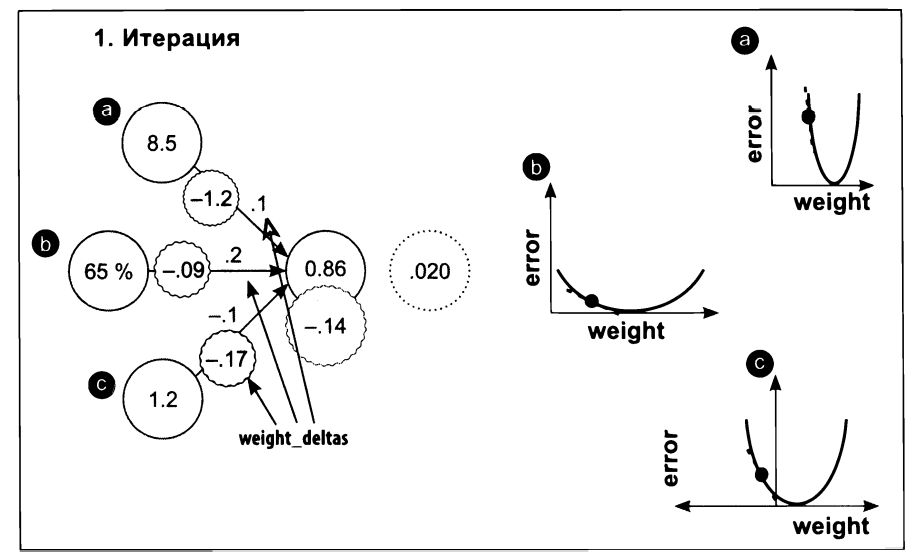

Возможно, вы удивитесь, что ошибка по-прежнему оказывается в самой нижней точке на графике (а). Чем это объясняется? Дело в том, что каждый отдельный вес оценивается относительно глобальной ошибки. Из-за того что ошибка
является общей, когда для какого-то из весов она оказывается в нижней точке,
она также оказывается в нижней точке для всех остальных весов.


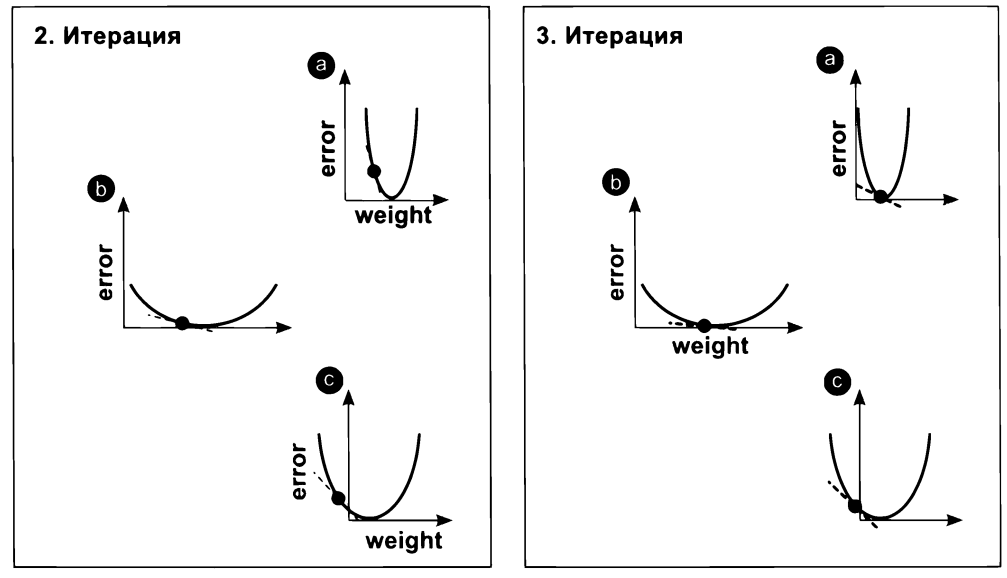

Это чрезвычайно важный вывод. Во-первых, если достигнуто схождение
(error = 0) с весами (Ь) и (с), то последующая попытка выполнить обучение
веса (а) ровным счетом ничего не даст. Почему? Потому что error = 0, а значит
weight_delta получит значение 0. Это обстоятельство раскрывает потенциально разрушительное свойство нейронных сетей: у вас может иметься мощный
вход с большой предсказательной способностью, но если сеть случайно выяснит, как получить точный прогноз на обучающих данных без его участия, она
никогда не научится включать его в прогноз.

Также обратите внимание, как точка на графике (а) оказывается внизу на кривой. Здесь смещается не черная точка, а сама кривая. Что это значит? Черная
точка может смещаться по горизонтали только при изменении веса. Поскольку
вес (а) в этом эксперименте был заморожен, горизонтальная координата точки
остается фиксированной. Но сама ошибка error уменьшилась до 0.


Это говорит нам об истинной природе графиков. По правде говоря, это двумерные срезы четырехмерной фигуры. Три измерения соответствуют весам,
а четвертое — ошибке. Эта фигура называется поверхностью ошибки, и, хотите
верьте, хотите нет, ее кривизна определяется обучающими данными. Почему?

Величина ошибки определяется обучающими данными. Любая сеть может
иметь любое значение веса, но значение ошибки при любой комбинации весов
на 100 % определяется данными. Вы уже видели (в нескольких случаях), как
входные данные влияют на крутизну U-образной кривой. Обучая нейронную
сеть, мы фактически пытаемся найти самую нижнюю точку на поверхности
ошибки, где нижняя точка соответствует наименьшей ошибке. Интересно?!
Мы еще вернемся к этой идее, а пока отложим ее в сторону.

## Обучение методом градиентного спуска с несколькими выходами

**Нейронные сети способны также возвращать несколько прогнозов для единственного входа**

Возможно, решение покажется вам очевидным: для каждого выхода нужно
вычислить свою разность delta и затем умножить их на единственный вход.
В результате получатся приращения weight_delta для всех весов. Сейчас вам
должно быть понятно, что для обучения широкого разнообразия архитектур
последовательно используется простой механизм (стохастический градиентный спуск).


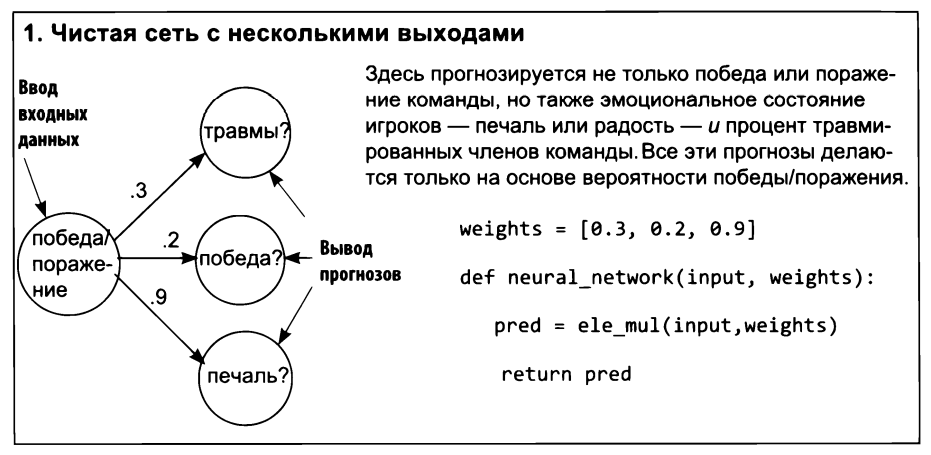

In [ ]:
# Instead of predicting just 
# whether the team won or lost, 
# now we're also predicting whether
# they are happy/sad AND the
# percentage of the team that is
# hurt. We are making this
# prediction using only
# the current win/loss record.

weights = [0.3, 0.2, 0.9] 

def neural_network(input, weights):
    pred = ele_mul(input,weights)
    return pred

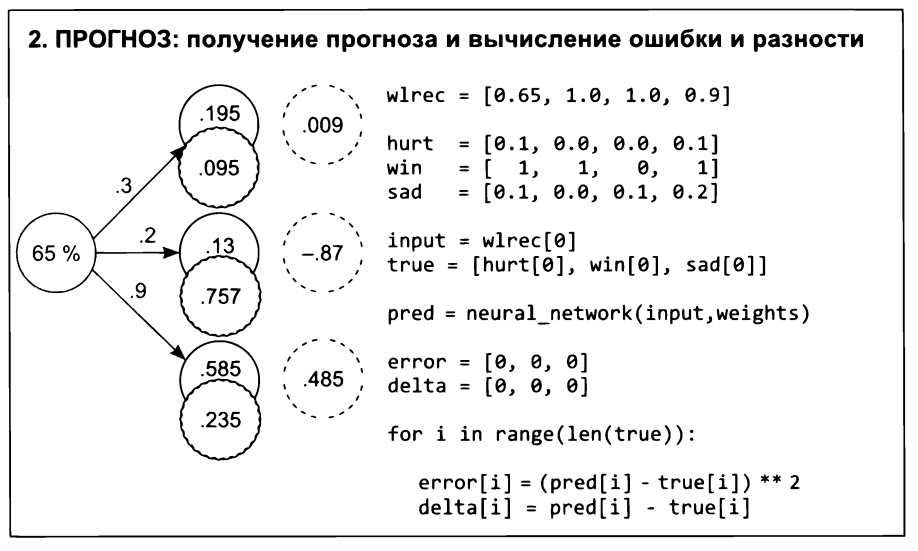

In [ ]:
wlrec = [0.65, 1.0, 1.0, 0.9]

hurt  = [0.1, 0.0, 0.0, 0.1]
win   = [  1,   1,   0,   1]
sad   = [0.1, 0.0, 0.1, 0.2]

input = wlrec[0]
true = [hurt[0], win[0], sad[0]]

pred = neural_network(input, weights)

error = [0, 0, 0] 
delta = [0, 0, 0]

for i in range(len(true)):
    error[i] = (pred[i] - true[i]) ** 2
    delta[i] = pred[i] - true[i]

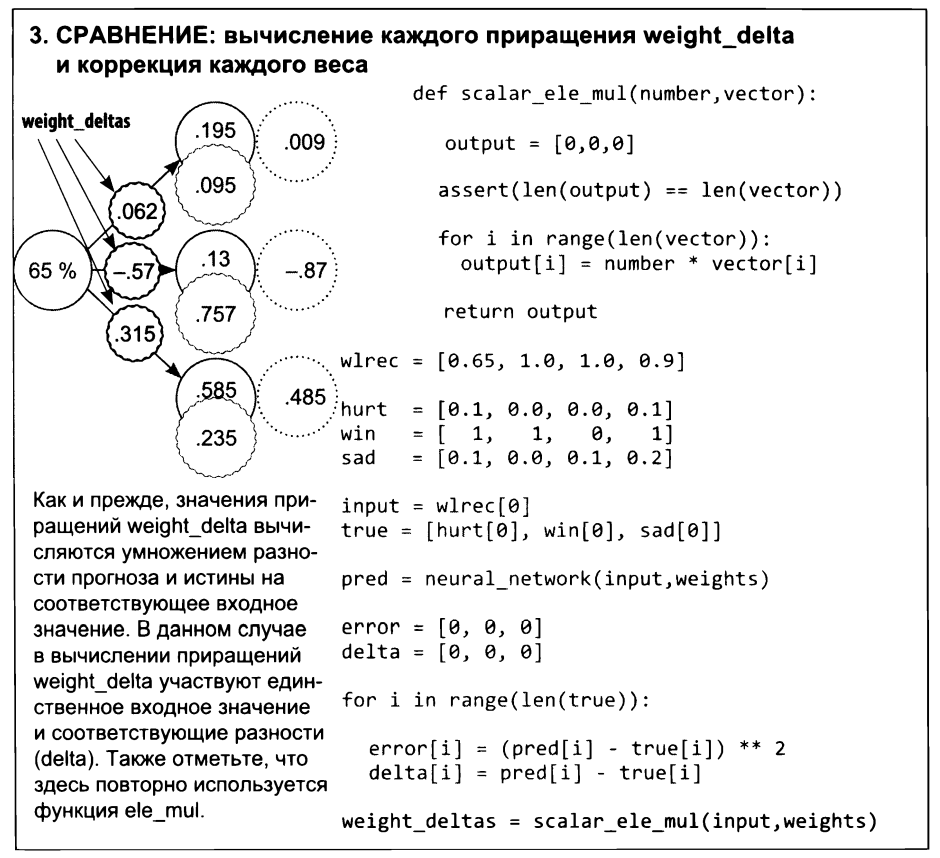

In [ ]:
def scalar_ele_mul(number,vector):
    output = [0,0,0]

    assert(len(output) == len(vector))

    for i in range(len(vector)):
        output[i] = number * vector[i]

    return output

weight_deltas = scalar_ele_mul(input,delta)

alpha = 0.1

for i in range(len(weights)):
    weights[i] -= (weight_deltas[i] * alpha)
    
print("Weights:" + str(weights))
print("Weight Deltas:" + str(weight_deltas))

Weights:[0.293825, 0.25655, 0.868475]
Weight Deltas:[0.061750000000000006, -0.5655, 0.3152500000000001]


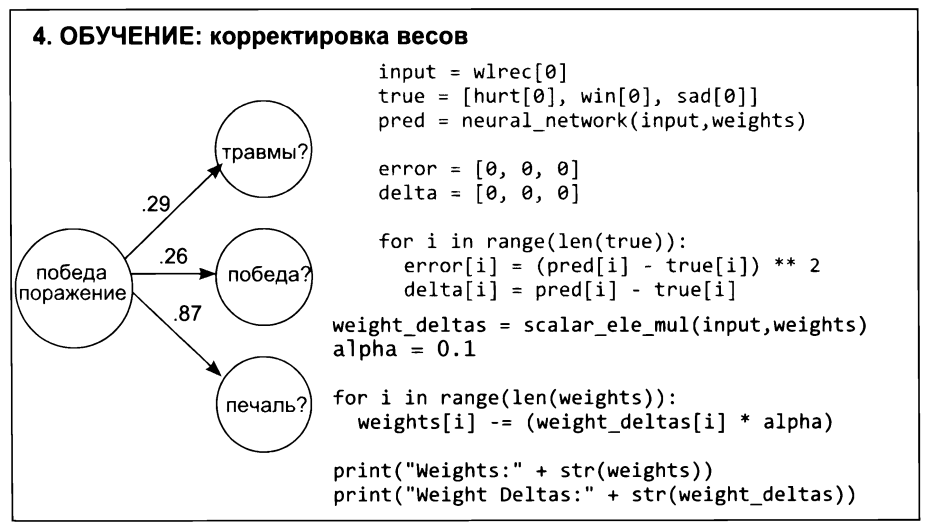

## Чему обучаются эти веса?
**Каждый вес стремится уменьшить ошибку, но чему они учатся в совокупности?**

Поздравляю! Вы достигли точки в повествовании, в которой мы перейдем к обработке первого набора данных из реального мира. Так удачно совпало, что он
имеет историческое значение.

Он называется модифицированным набором данных Национального института стандартов и технологий (Modified National Institute of Standards and
Technology, MNIST) и состоит из набора черно-белых изображений рукописных
цифр, много лет тому назад написанных учениками старших классов и сотрудниками Бюро переписи США. Каждое изображение сопровождается фактическим числом (0-9). В последние несколько десятилетий люди использовали
этот набор для обучения нейронных сетей распознаванию рукописного текста,
и сегодня мы тоже предпримем такую попытку.


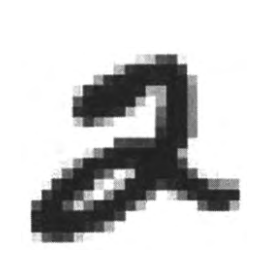

Каждое изображение состоит из 784 пикселов (28 х 28). Учитывая, что на входе
имеется 784 пиксела и на выходе 10 возможных меток, уже можно представить
форму нейронной сети: каждый обучающий образец содержит 784 значения (по
одному на каждый пиксел), поэтому нейронная сеть должна иметь 784 входа.
Довольно просто, не так ли? Мы выбрали число входных узлов по числу точек
данных в каждом обучающем образце. Нам нужно предсказать 10 вероятностей: по одной для каждой цифры. Получив изображение, нейронная сеть
должна вернуть эти 10 вероятностей, сообщая, какая цифра вероятнее всего
изображена.

Как настроить нейронную сеть для получения 10 вероятностей? В предыдущем разделе вы видели диаграмму нейронной сети, способной принимать
несколько входов и возвращать несколько прогнозов. Мы можем изменить
эту сеть, чтобы создать нужное число входов и выходов для решения новой
задачи анализа данных в наборе MNIST. Итак, скорректируем сеть, создав
784 входа и 10 выходов.

В блокноте MNISTPreprocessor имеется сценарий, выполняющий предварительную обработку набора данных MNIST и загружающий первую 1000 изображений и меток в две матрицы NumPy с именами images и labels. Возможно, вам интересно узнать, как двумерные изображения размером 28 х 28 пикселов загрузить в плоскую нейронную сеть. Ответ прост: каждое изображение преобразуется в вектор 1 х 784. Сначала в вектор записывается первый ряд пикселов, затем второй, третий и так далее, пока не получится единый список пикселов изображения (длиной 784 пиксела).

На следующем рисунке изображена новая нейронная сеть, выполняющая классификацию данных из набора MNIST. Она очень похожа на сеть с несколькими
входами и выходами, которую мы обучали выше. Разница лишь в количестве
входов и выходов, которое существенно увеличилось. Эта сеть имеет 784 входа (по одному для каждого пиксела в изображении 28 х 28) и 10 выходов (по
одному для каждой возможной цифры).


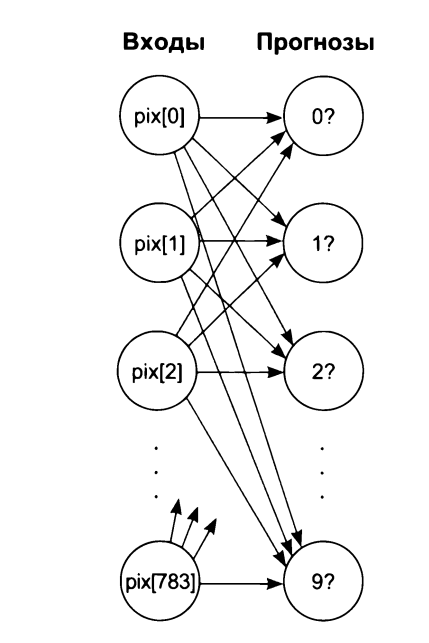

Если бы сеть была способна давать точный прогноз, тогда, получив пикселы
изображения (например, с цифрой 2, как на следующем рисунке), она вернула
бы прогнозную вероятность 1.0 в соответствующем выходе (в данном случае
в третьем) и 0 во всех остальных. Если сеть сумеет дать правильный прогноз
для всех изображений в наборе данных, тогда она будет иметь ошибку, равную
нулю.

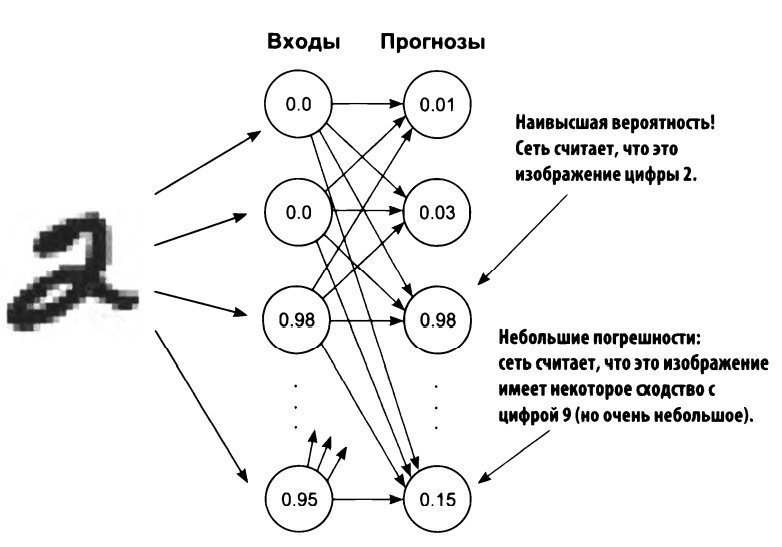

В процессе обучения сеть будет корректировать веса между входами и выходами, стремясь уменьшить ошибку до 0. Но как это происходит? Как происходит
корректировка кучи весов при изучении совокупности закономерностей?

## Визуализация значений весов
Простым и интересным способом исследования нейронных сетей (особенно предназначенных для классификации изображений) является визуализация весов, как если бы они представляли пикселы изображений. Взглянув на следующую диаграмму, вы поймете, о чем речь.


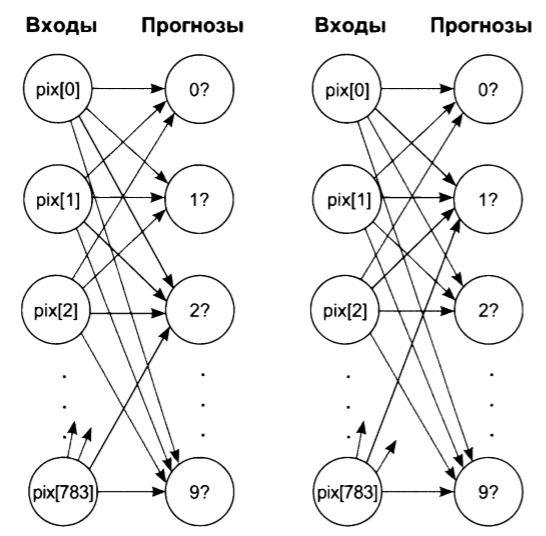

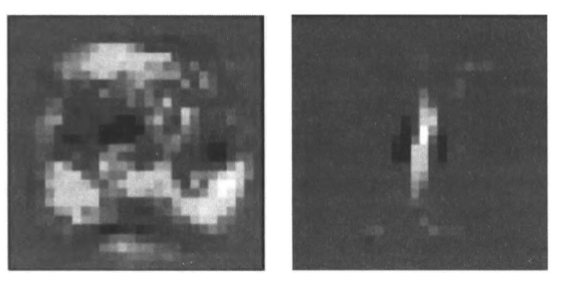

Каждому выходному узлу соответствуют веса, исходящие из пикселов в исходном изображении. Например, узел 2? имеет 784 входящих веса, каждый из которых отражает связь между пикселом и цифрой 2.

Что это за связь? Все просто: если вес имеет высокое значение, значит, модель считает, что между этим пикселом и цифрой 2 существует сильная корреляция. Если вес имеет очень низкое (отрицательное) значение, значит, сеть полагает, что корреляция между этим пикселом и цифрой 2 очень слабая (или даже отрицательная).

Если вывести все эти веса в виде изображения, имеющего ту же форму, что и изображения из исходного набора данных, можно увидеть, какие пикселы имеют наивысшую корреляцию с конкретным выходным узлом. В нашем примере на изображениях, построенных для 2 и 1 с использованием весов, можно видеть очень расплывчатые цифры 2 и 1 соответственно. Яркие области соответствуют высоким весам, а темные — отрицательным. Нейтральные области представляют 0 в матрице весов. Эти изображения показывают, как нейронная сеть представляет форму цифр 2 и 1.

Как это получилось? Чтобы понять, нужно вернуться к уроку о скалярном произведении. Рассмотрим кратко его суть.

## Визуализация скалярных произведений (сумм весов)
Напомню, как вычисляется скалярное произведение. В этой операции участвуют два вектора. Сначала векторы перемножаются друг на друга (поэлементно), а затем произведения суммируются. Взгляните на следующий пример:


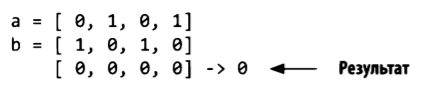

Здесь сначала перемножаются пары соответствующих элементов в а и Ь, в результате чего получается промежуточный вектор, состоящий из нулей. После этого элементы промежуточного вектора складываются, что дает окончательный результат 0. Почему? Потому что векторы не имеют ничего общего между собой.

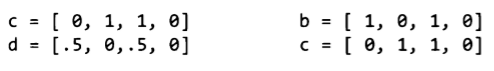

Но скалярное произведение с на d вернет более высокий результат, потому что в столбцах, имеющих положительные значения, есть совпадение. Скалярное произведение между идентичными векторами также даст высокое значение в результате. И какой вывод? Скалярное произведение может служить своеобразной оценкой сходства двух векторов.

Что это значит для весов и входов в нашей нейронной сети? Если вектор весов имеет сходство с входным вектором, представляющим цифру 2, тогда, благодаря этому сходству, на выходе цифра 2 получит высокую оценку вероятности. И наоборот, если вектор весов не имеет сходства с входным вектором для 2, на выходе эта цифра получит низкую оценку. Это наглядно иллюстрирует следующий рисунок. Сможете теперь сами объяснить, почему наибольшая оценка (0.98) выше наименьшей (0.01)?


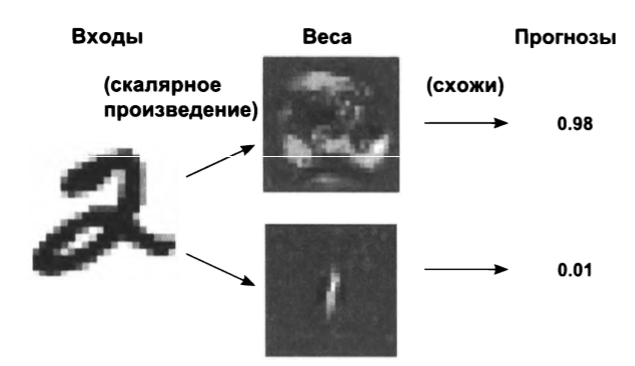

**Итоги**

***Градиентный спуск — универсальный алгоритм машинного обучения***

Самый важный, пожалуй, вывод этой главы — градиентный спуск является очень гибким алгоритмом машинного обучения. Если скомбинировать веса способом, позволяющим вычислить функцию ошибки и разность delta, то алгоритм градиентного спуска сможет подсказать вам, как следует скорректировать веса, чтобы уменьшить ошибку. В оставшейся части книги мы займемся исследованием разных комбинаций весов и функций ошибки, где может пригодиться градиентный спуск. И начнем прямо со следующей главы.

In [ ]:
            #toes %win #fans
weights = [ [0.1, 0.1, -0.3],#hurt?
            [0.1, 0.2, 0.0], #win?
            [0.0, 1.3, 0.1] ]#sad?

def w_sum(a,b):
    assert(len(a) == len(b))
    output = 0

    for i in range(len(a)):
        output += (a[i] * b[i])

    return output

def vect_mat_mul(vect,matrix):
    assert(len(vect) == len(matrix))
    output = [0,0,0]
    for i in range(len(vect)):
        output[i] = w_sum(vect,matrix[i])
    return output

def neural_network(input, weights):
    pred = vect_mat_mul(input,weights)
    return pred

toes  = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65,0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

hurt  = [0.1, 0.0, 0.0, 0.1]
win   = [  1,   1,   0,   1]
sad   = [0.1, 0.0, 0.1, 0.2]

alpha = 0.01

input = [toes[0],wlrec[0],nfans[0]]
true  = [hurt[0], win[0], sad[0]]

pred = neural_network(input,weights)

error = [0, 0, 0] 
delta = [0, 0, 0]

for i in range(len(true)):
    error[i] = (pred[i] - true[i]) ** 2
    delta[i] = pred[i] - true[i]

In [ ]:
import numpy as np
def outer_prod(a, b):
    
    # just a matrix of zeros
    out = np.zeros((len(a), len(b)))

    for i in range(len(a)):
        for j in range(len(b)):
            out[i][j] = a[i] * b[j]
    return out

weight_deltas = outer_prod(delta,input)

for i in range(len(weights)):
    for j in range(len(weights[0])):
        weights[i][j] -= alpha * weight_deltas[i][j]

In [ ]:
weights

[[0.061325, 0.0970425, -0.30546],
 [0.1017, 0.20013, 0.00023999999999999887],
 [-0.07352500000000001, 1.2943775, 0.08962]]